In [93]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [39]:
#read csv file/dataset, courtesy of Kaggle.com: https://www.kaggle.com/uciml/sms-spam-collection-dataset

fields = ['label','message']

df = pd.read_csv(r"C:\Users\bryan\Desktop\email.csv", encoding='latin-1',usecols=fields)

In [40]:
df.head()

,label,message
0,ham,Watching telugu movie..wat abt u?
1,ham,i see. When we finish we have loads of loans t...
2,ham,Hi. Wk been ok - on hols now! Yes on for a bit...
3,ham,Please don't text me anymore. I have nothing e...
4,ham,Okay name ur price as long as its legal! Wen c...


In [41]:
#check if there are any null values

df.isnull().sum()

label      0
message    0
dtype: int64

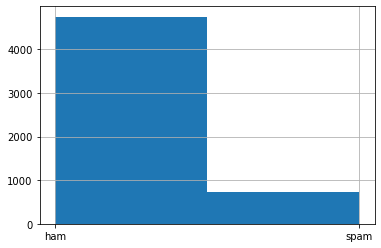

In [42]:
#plot frequency of ham or spam

df['label'].hist(bins=2)

In [43]:
#from the visulization and the value counts, we see that ham is much easier to spot than spam

df['label'].value_counts()

ham     4746
spam     730
Name: label, dtype: int64

In [44]:
#split the dataset between training and testing

X = df['message']
y = df['label']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model 1: Linear SVC

In [60]:
""""ML models cannot function on raw text data; 
therefore, we must vectorize the message column, linking words to a matrix/vector of numbers. 
We can combine both vectorization and model selection using sklearn's Pipeline command"""

spam_ham_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [61]:
#once the pipleine is created, we need to fit it to the training set (X_train, y_train)

spam_ham_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [53]:
#since we still have testing data, we need to predict on X_test

pred = spam_ham_clf.predict(X_test)

In [54]:
#the confusion_matrix will tell us how many messages were true positives/negatives and false positives/neagatives

print(confusion_matrix(y_test, pred))

[[1423    5]
 [  21  194]]


In [55]:
#the classification_report provides more detail on the confsuion_matrix, 
#including the F1 score, which takes into account true and false positives, and penalizes the model accordingly

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1428
        spam       0.97      0.90      0.94       215

    accuracy                           0.98      1643
   macro avg       0.98      0.95      0.96      1643
weighted avg       0.98      0.98      0.98      1643



In [57]:
#given our relatively small dataset, we get an accuracy of 98%. 

metrics.accuracy_score(y_test, pred)

0.9841752891052952

In [67]:
#since our model appears to be very accurate, we have to check for overfitting. 
#to do this we estimate the cross-validation_score. 

print(cross_val_score(spam_ham_clf, X, y, cv=5).mean())

0.9857559244075592


In [58]:
#test cases on new, unknown messages

spam_ham_clf.predict(['Free Viagra!!!'])

array(['spam'], dtype=object)

In [59]:
spam_ham_clf.predict(['Hey, Bryan. I hope you are doing well'])

array(['ham'], dtype=object)

# Model 2: Logistic Regression

In [71]:
spam_ham_clf_LR = Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression())])

In [72]:
spam_ham_clf_LR.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [73]:
prediction = spam_ham_clf_LR.predict(X_test)

In [77]:
print(confusion_matrix(y_test, prediction))

[[1426    2]
 [  47  168]]


In [78]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1428
        spam       0.99      0.78      0.87       215

    accuracy                           0.97      1643
   macro avg       0.98      0.89      0.93      1643
weighted avg       0.97      0.97      0.97      1643



In [80]:
metrics.accuracy_score(y_test, prediction)

0.9701765063907486

In [102]:
print(cross_val_score(spam_ham_clf_LR, X, y, cv=5).mean())

0.9693204012932041


# Model 3: Decision Trees

In [82]:
spam_ham_clf_DT = Pipeline([('tfidf',TfidfVectorizer()),('clf',DecisionTreeClassifier())])

In [83]:
spam_ham_clf_DT.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [84]:
predictions = spam_ham_clf_DT.predict(X_test)

In [86]:
print(confusion_matrix(y_test, predictions))

[[1410   18]
 [  32  183]]


In [87]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1428
        spam       0.91      0.85      0.88       215

    accuracy                           0.97      1643
   macro avg       0.94      0.92      0.93      1643
weighted avg       0.97      0.97      0.97      1643



In [99]:
metrics.accuracy_score(y_test, predictions)

0.9695678636640293

In [103]:
print(cross_val_score(spam_ham_clf_DT, X, y, cv=5).mean())

0.9612848715128488


# Model 4: Multinomial Naive Bayes 

In [104]:
spam_ham_clf_MNB = Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])

In [105]:
spam_ham_clf_MNB.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [106]:
predictions2 = spam_ham_clf_MNB.predict(X_test)

In [107]:
print(confusion_matrix(y_test, predictions2))

[[1428    0]
 [  65  150]]


In [108]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1428
        spam       1.00      0.70      0.82       215

    accuracy                           0.96      1643
   macro avg       0.98      0.85      0.90      1643
weighted avg       0.96      0.96      0.96      1643



In [109]:
metrics.accuracy_score(y_test, predictions2)

0.960438222763238

In [110]:
print(cross_val_score(spam_ham_clf_MNB, X, y, cv=5).mean())

0.957632403426324


In [111]:
#from testing these four models, we can say lienar SVM is the best-performing model, with the other 3 not far behind.